### Загрузить датасет в соответствии с вариантом и провести визуальный и разведочный анализ данных.

Определить входные и выходные переменные.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
data = pd.read_csv('/content/clustering_1_3008.csv')
data.head()

,age,sex,profession,income
0,33.0,female,worker,91786.0
1,34.0,female,unemployed,46724.0
2,42.0,female,homewife,51351.0
3,29.0,female,unemployed,47083.0
4,37.0,female,worker,91562.0


In [ ]:
data.shape

(10000, 4)

In [ ]:
data.describe()

,age,income
count,9521.000000,10000.000000
mean,34.965760,77494.399100
std,4.998853,28965.823446
min,18.000000,46042.000000
25%,32.000000,51613.000000
50%,35.000000,66724.000000
75%,38.000000,111429.000000
max,55.000000,200000.000000


Проверить наличие пропущенных значений в данных.

In [ ]:
data.isnull().sum()

age           479
sex           479
profession      0
income          0
dtype: int64

Для количественных признаков построить диаграммы рассеяния и диаграммы Box-and-Whisker, для категориальных признаков – гистограммы частот вариантов. Сделать выводы о характере распределений признаков, наличии выбросов.
В исходном датасете количественными признаками являются age и income

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>]], dtype=object)

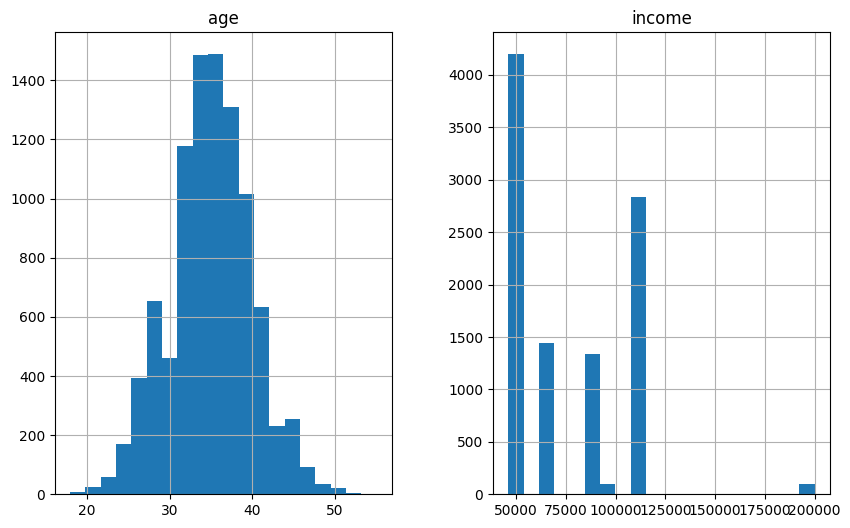

In [ ]:
data.hist(figsize=(10, 6), bins=20)

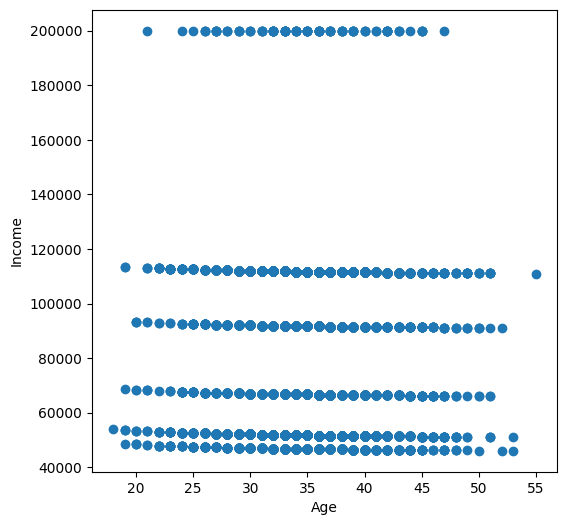

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x = data['age'], y = data['income'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [ ]:
def show_box_and_whisker(data, by):
    data.boxplot(column='age', by=by)
    plt.xlabel("Age")
    plt.ylabel("Income")
    plt.show()

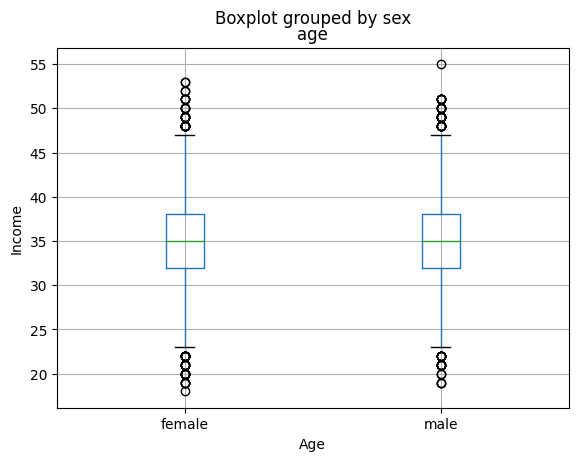

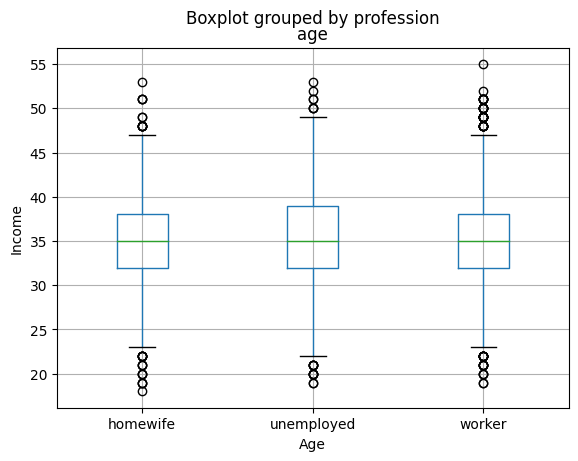

In [ ]:
show_box_and_whisker(data, 'sex')
show_box_and_whisker(data, 'profession')

<Axes: >

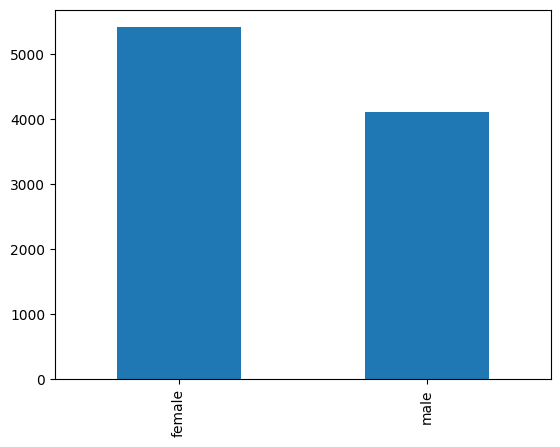

In [ ]:
data.sex.value_counts().plot(kind='bar')

<Axes: >

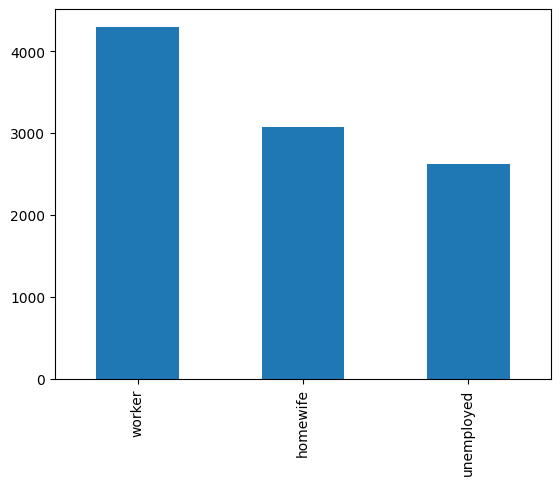

In [ ]:
data.profession.value_counts().plot(kind='bar')

Для количественных переменных построить диаграммы рассеяния и рассчитать статистику (среднее значение, размах, число вариантов и др.).

In [ ]:
print(f"Среднее значение возраста: {data['age'].mean()}")
print(f"Размах возраста: {data['age'].std()}")
print(f"Число уникальных значений возраста: {len(data['age'].value_counts())}")

Среднее значение возраста: 34.96575989917026
Размах возраста: 4.998853205956189
Число уникальных значений возраста: 37


In [ ]:
print(f"Среднее значение зарплаты: {data['income'].mean()}")
print(f"Размах зарплаты: {data['income'].std()}")
print(f"Число уникальных значений зарплаты: {len(data['income'].value_counts())}")

Среднее значение зарплаты: 77494.3991
Размах зарплаты: 28965.82344605466
Число уникальных значений зарплаты: 170


### Построить базовую модель машинного обучения.

Устранить строки с пропущенными значениями.

In [ ]:
data.isna().sum()

age           479
sex           479
profession      0
income          0
dtype: int64

In [ ]:
data = data.dropna()
data.shape

(9521, 4)

Провести OneHot-кодирование номинальных признаков (используя метод sklearn.preprocessing.OneHotEncoder с опцией drop=’first’).

In [ ]:
encoded_features = pd.get_dummies(data[['sex', 'profession']], drop_first=True)
encoded_df = pd.concat([data[['age', 'income']], encoded_features], axis=1)
encoded_df.head()

,age,income,sex_male,profession_unemployed,profession_worker
0,33.0,91786.0,0,0,1
1,34.0,46724.0,0,1,0
2,42.0,51351.0,0,0,0
3,29.0,47083.0,0,1,0
4,37.0,91562.0,0,0,1


Визуализировать корреляционную матрицу признаков, сделать выводы.

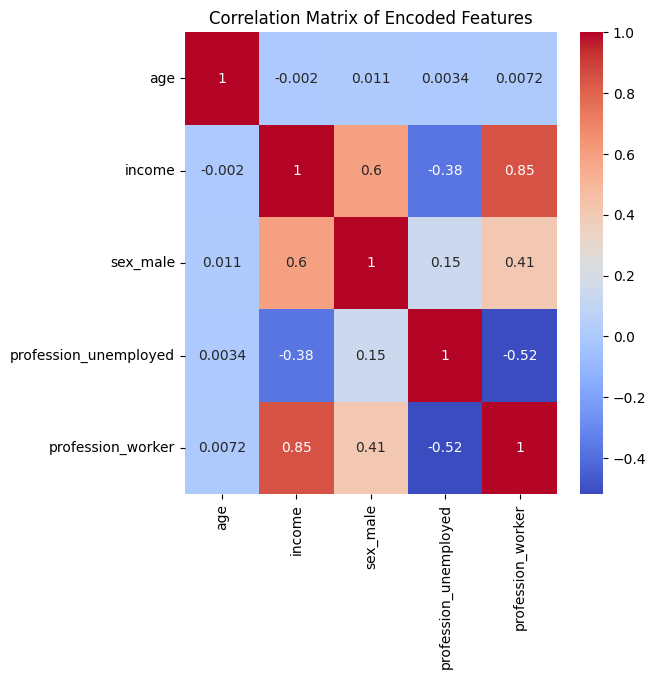

In [ ]:
correlation_matrix = encoded_df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Encoded Features")
plt.show()

Разбить исходную выборку на обучающую и тестовую (70% первых строк включить в обучающую выборку, оставшиеся строки – в тестовую).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, encoded_df['income'], test_size=0.3, shuffle=False)

Обучить модель.

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
print(principal_components)

[[ 2.27990270e+04 -1.88577528e+00]
 [-2.22629730e+04 -9.73014311e-01]
 [-1.76359730e+04  7.03513485e+00]
 ...
 [-2.06397298e+03 -3.93292500e+00]
 [-2.67097301e+03  8.06588569e+00]
 [ 4.32860270e+04 -7.84512398e+00]]


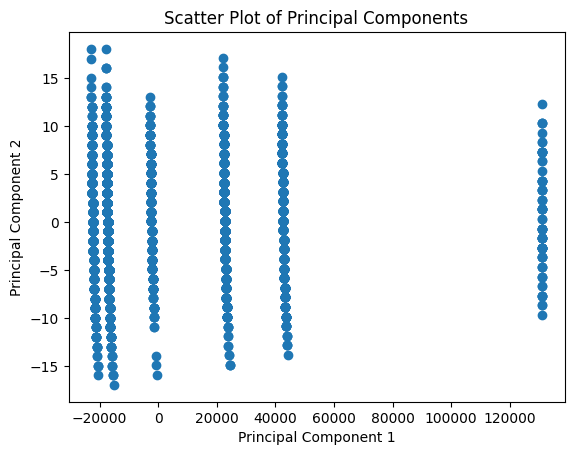

In [ ]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(principal_components)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhouette_avg = silhouette_score(principal_components, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.8624087352842892


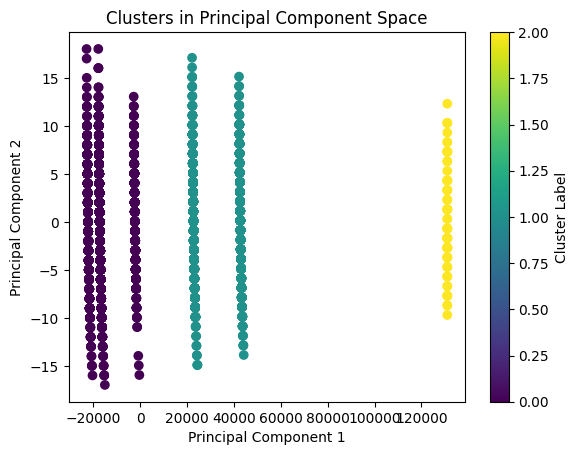

In [ ]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in Principal Component Space')
plt.colorbar(label='Cluster Label')
plt.show()

### Улучшить точность базовой модели.

Выбрать метод и провести восстановление пропущенных значений в обучающей выборке.

In [ ]:
data = pd.read_csv('/content/clustering_1_3008.csv')
data.head()

,age,sex,profession,income
0,33.0,female,worker,91786.0
1,34.0,female,unemployed,46724.0
2,42.0,female,homewife,51351.0
3,29.0,female,unemployed,47083.0
4,37.0,female,worker,91562.0


In [ ]:
data['age'] = data['age'].fillna(data['age'].mean()).round(0)

In [ ]:
data['sex'] = data['sex'].fillna(np.random.choice(['male','female']))

In [ ]:
data.isnull().sum()

age           0
sex           0
profession    0
income        0
dtype: int64

Предложить метод и устранить выбросные значения в обучающей выборке.

In [ ]:
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

In [ ]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())
data.shape

9589
0


(296, 4)

Выбрать способ и провести преобразования входных и выходных переменных, привести обоснование выбранного способа преобразования.

In [ ]:
encoded_features = pd.get_dummies(data[['sex', 'profession']], drop_first=True)
encoded_df = pd.concat([data[['age', 'income']], encoded_features], axis=1)
encoded_df.head()

,age,income,sex_male,profession_unemployed,profession_worker
0,33.0,91786.0,0,0,1
1,34.0,46724.0,0,1,0
2,42.0,51351.0,0,0,0
3,29.0,47083.0,0,1,0
4,37.0,91562.0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, encoded_df['income'], test_size=0.3, shuffle=False)

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)

При необходимости провести отбор признаков / сократить размерность числа признаков/ сформировать новые признаки. Привести обоснование использованных методов формирования признаков.

Признаков и так мало, убирать ничего не нужно

Выбрать модель и алгоритм машинного обучения для решения поставленной задачи или модифицировать базовую модель, привести обоснование выбора / модификаций.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

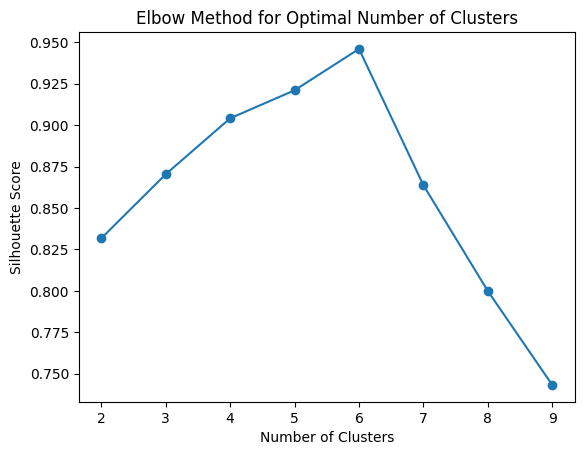

In [ ]:
num_clusters = range(2, 10)

silhouette_scores = []

for num in num_clusters:
    kmeans = KMeans(n_clusters=num)
    cluster_labels = kmeans.fit_predict(principal_components)
    silhouette_avg = silhouette_score(principal_components, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

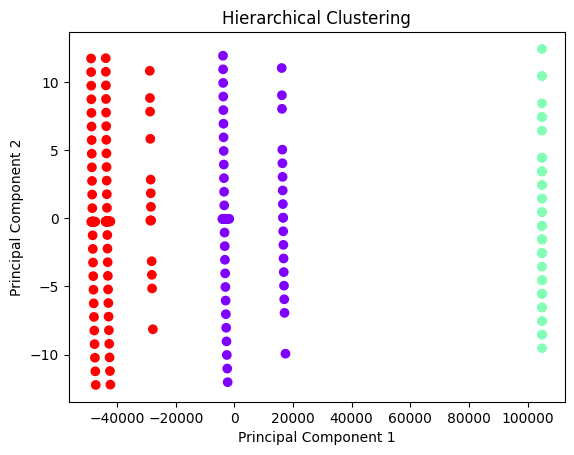

Silhouette Score: 0.8703902992636287


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_clustering = AgglomerativeClustering(n_clusters=3)

cluster_labels = hierarchical_clustering.fit_predict(principal_components)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering')
plt.show()

silhouette_avg = silhouette_score(principal_components, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')